In [6]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import plot_model

In [7]:
#(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [93]:
x_test.shape

(10000, 32, 32, 3)

we have 50000 training images and 10000 test images

In [7]:
len(x_train[1][1])

32

In [16]:
print(f'Total data for traing: {x_train.shape[0]}, Train X shape: {x_train.shape}, Train y shape: {y_train.shape}')
print(f'Total data for test: {x_test.shape[0]}, Test X shape: {x_test.shape}, Test y shape: {y_test.shape}')

Total data for traing: 50000, Train X shape: (50000, 32, 32, 3), Train y shape: (50000, 1)
Total data for test: 10000, Test X shape: (10000, 32, 32, 3), Test y shape: (10000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

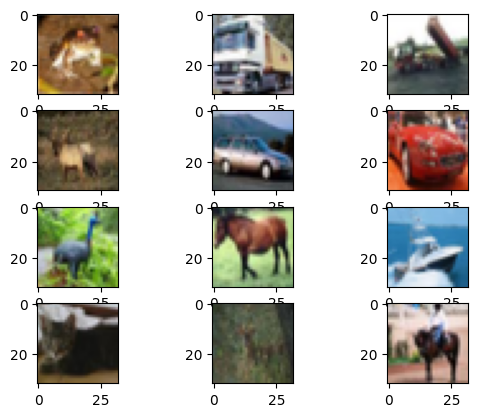

In [9]:
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(x_train[i])
plt.show

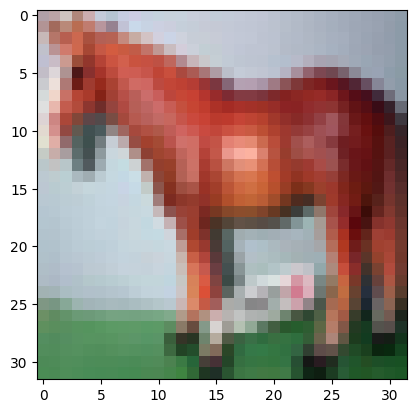

In [10]:
i = 318
plt.imshow(x_train[i])
plt.show()

preporces

In [8]:
print(y_train[0 : 3], '\n')

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

print(y_train[0 : 3, :])

[[6]
 [9]
 [9]] 

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
x_train = (np.reshape(x_train, (50000, 32*32*3)) / 255.0)
x_test = (np.reshape(x_test, (10000, 32*32*3)) / 255.0)

In [7]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [11]:
inp_layer = Input(shape = (3072,))
hidden_layer = Dense(units = 2048, activation = 'relu')(inp_layer)#relu
layers.BatchNormalization()
layers.Dropout(0.2)
hidden_layer_II = Dense(units = 256, activation = 'relu')(hidden_layer)
layers.BatchNormalization()
layers.Dropout(0.2)
#hidden_layer_III = Dense(units = 64, activation = 'relu')(hidden_layer_II)
out_layer = Dense(units = 10, activation = 'softmax')(hidden_layer_II)
model = Model(inputs = inp_layer, outputs = out_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,820,618 (26.02 MB)

 Trainable params: 6,820,618 (26.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
!pip install graphviz

In [21]:
plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [12]:
#SGD
op=tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
results = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data = (x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.2831 - loss: 2.0222 - val_accuracy: 0.4030 - val_loss: 1.6849
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.4038 - loss: 1.6782 - val_accuracy: 0.4333 - val_loss: 1.5964
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.4364 - loss: 1.5732 - val_accuracy: 0.4614 - val_loss: 1.5186
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.4571 - loss: 1.5225 - val_accuracy: 0.4560 - val_loss: 1.5170
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.4736 - loss: 1.4716 - val_accuracy: 0.4633 - val_loss: 1.5266
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.4917 - loss: 1.4290 - val_accuracy: 0.4822 - val_loss: 1.4649
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5052 - loss: 1.3942 - val_accuracy: 0.4888 - val_loss: 1.4418
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5186 - loss: 1.3511 - 

In [14]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[3.8189813e-02, 8.9483291e-02, 3.3833031e-02, ..., 1.6837625e-03,
        1.5541137e-02, 1.9701945e-02],
       [9.8312497e-03, 2.3346347e-01, 7.6015998e-04, ..., 1.1215173e-03,
        3.7103575e-01, 3.7839752e-01],
       [2.8302526e-01, 7.9533897e-02, 3.4036008e-03, ..., 1.1065753e-02,
        5.4499209e-01, 7.1953237e-02],
       ...,
       [7.8613441e-03, 5.8654790e-05, 1.7791029e-02, ..., 2.7458383e-02,
        5.6049777e-03, 1.4941598e-03],
       [1.4367141e-03, 8.0258446e-04, 1.4596032e-01, ..., 7.3802043e-03,
        6.5112970e-04, 2.3697424e-03],
       [8.2894079e-02, 2.6883855e-03, 8.2223274e-02, ..., 5.4304653e-01,
        7.4479356e-03, 9.1115842e-03]], dtype=float32)

In [15]:
y_hat = np.argmax(model.predict(x_test), axis=1)
test_labels = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [16]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_hat))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1000
           1       0.66      0.66      0.66      1000
           2       0.47      0.32      0.38      1000
           3       0.35      0.47      0.40      1000
           4       0.46      0.46      0.46      1000
           5       0.42      0.41      0.41      1000
           6       0.55      0.63      0.59      1000
           7       0.61      0.60      0.60      1000
           8       0.69      0.64      0.66      1000
           9       0.58      0.60      0.59      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, y_hat))

[[582  33  52  46  32  29  26  40 106  54]
 [ 33 658   3  36  12  11  14  21  44 168]
 [ 64  23 320 129 144 105 110  71   9  25]
 [ 14  16  49 469  55 192 124  30  19  32]
 [ 37  11 116  94 459  57 103  83  28  12]
 [ 19  10  45 282  63 407  80  55  17  22]
 [  2  15  41  93 124  49 629  19   9  19]
 [ 31  15  39  90  76  84  24 597   9  35]
 [115  67  13  45  17  16  11  14 636  66]
 [ 33 156   9  58  11  18  21  52  45 597]]


In [27]:
!pip install seaborn

In [19]:
import seaborn as sns

<Axes: >

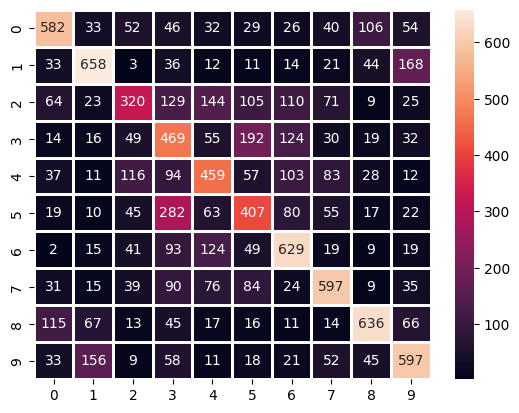

In [20]:
cf_matrix = confusion_matrix(test_labels, y_hat)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

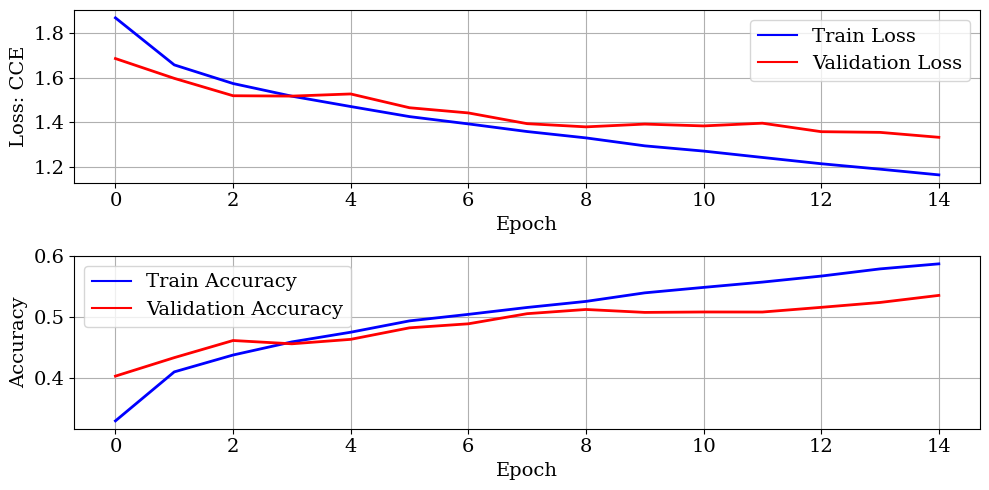

In [21]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss = results.history['loss']
val_loss = results.history['val_loss']


# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss, label='Train Loss', color ='b')
axs[0].plot(val_loss, label='Validation Loss', color='r')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc =results.history['accuracy']
val_acc = results.history['val_accuracy']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc, label='Train Accuracy', color ='b')
axs[1].plot(val_acc, label='Validation Accuracy', color='r')

# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()
